Initial EDA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')
df.shape

(404290, 6)

In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
48610,48610,86641,86642,How can I get a body like Chris Evans for Huma...,What were the major contributions of Vasil Kol...,0
378999,378999,510490,510491,What are the pros and cons of doing a trainees...,"Im a trainee on my final interview, that will ...",0
19474,19474,36800,36801,What does surgical strike means?,What do you mean by surgical strike?,1
297715,297715,288922,242870,What is the best book you read in 2014?,What are the most interesting books that you h...,0
95821,95821,159722,115433,Do you really think democracy is the best of a...,Is democracy the best form of government?,1
10436,10436,6674,20216,What can you teach me that can be useful in my...,What can you teach me?,1
5360,5360,1181,10551,How does a girl get a boyfriend?,How do I get a boyfriend here?,1
26126,26126,48662,48663,Experts say if GST is implemented in india the...,What are the things that will become expensive...,0
6033,6033,11833,11834,What is it like to be a child of a pornstar?,How is the life of the child of a Pornstar?,1
86715,86715,146193,146194,What are the best materials/videos/resources a...,How can I study a lot of things within 2 weeks?,0


<Axes: xlabel='is_duplicate'>

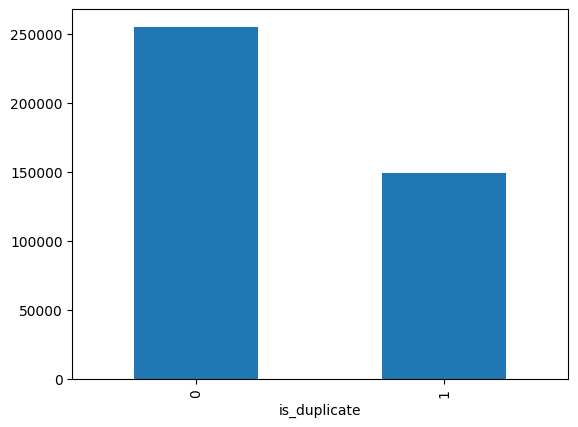

In [6]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

repeated questions histogram

In [10]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qid))
repeated_qs = np.sum(qid.value_counts() > 1)
print(f'Total number of unique questions are: {unique_qs}')
print(f'Number of repeated questions: {repeated_qs}')

Total number of unique questions are: 537933
Number of repeated questions: 111780


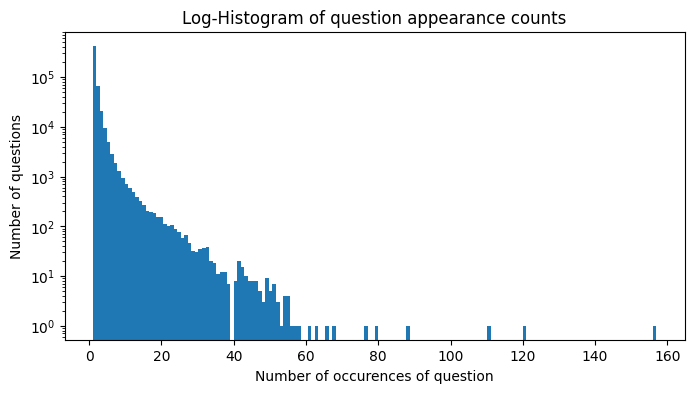

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(qid.value_counts(), bins=160)  # 160 bins because 80 is the maximum number of repeated questions
plt.yscale('log')  # log scale
plt.title('Log-Histogram of question appearance counts')  # title
plt.xlabel('Number of occurences of question')  # x-axis label
plt.ylabel('Number of questions')  # y-axis label
plt.show()

In [12]:
#make a copy of df and work on the copy
df_copy = df.copy()
df_copy

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


## Making New features 

### new features
1. Length of question 1
2. Length of question 2
3. no. of words in question 1
4. no. of questions in question 2
5. words common
6. words total in q1 + q2
7. word common

In [13]:
df_copy['q1_len'] = df_copy['question1'].str.len()
df_copy['q2_len'] = df_copy['question2'].str.len()
df_copy.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0


In [14]:
#no of words
df_copy['q1_num_words'] = df_copy['question1'].apply(lambda x: len(str(x).split()))
df_copy['q2_num_words'] = df_copy['question2'].apply(lambda x: len(str(x).split()))
df_copy.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13,7


In [15]:
def common_words(row):
    q1 = str(row['question1']).lower().strip() if pd.notnull(row['question1']) else ""
    q2 = str(row['question2']).lower().strip() if pd.notnull(row['question2']) else ""

    w1 = set(q1.split(" "))
    w2 = set(q2.split(" "))

    return len(w1 & w2)

In [16]:
df_copy['word_common'] = df_copy.apply(common_words, axis=1)
df_copy.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13,7,2


In [17]:
def total_words(row):
    q1 = str(row['question1']).lower().strip() if pd.notnull(row['question1']) else ""
    q2 = str(row['question2']).lower().strip() if pd.notnull(row['question2']) else ""

    w1 = set(q1.split(" "))
    w2 = set(q2.split(" "))

    return (len(w1) + len(w2))

In [18]:
df_copy['word_total'] = df_copy.apply(total_words, axis=1)
#show a particular row
df_copy.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13,7,2,20


In [19]:
#to show nth row
df_copy.iloc[398782]

id                                                         398782
qid1                                                       496695
qid2                                                       532029
question1       What is the best marketing automation tool for...
question2       What is the best marketing automation tool for...
is_duplicate                                                    1
q1_len                                                       76.0
q2_len                                                       77.0
q1_num_words                                                   12
q2_num_words                                                   12
word_common                                                    11
word_total                                                     24
Name: 398782, dtype: object

In [20]:
#word_share
df_copy['word_share'] = df_copy['word_common'] / df_copy['word_total']
df_copy.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14,10,4,24,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,11,9,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13,7,2,20,0.100000


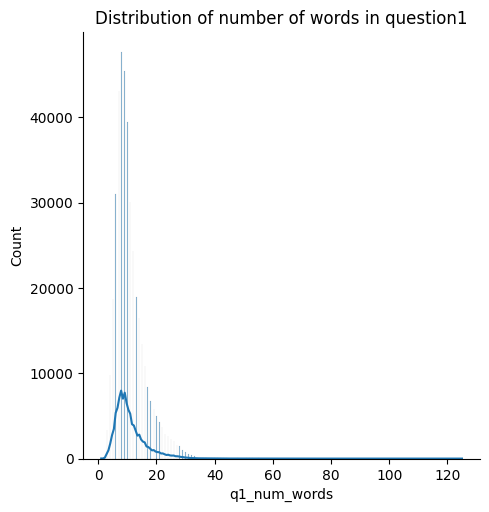

Max number of words in question1: 125
Min number of words in question1: 1
Mean number of words in question1: 10.942209799896114


In [21]:
sns.displot(df_copy['q1_num_words'], kde=True)
plt.title('Distribution of number of words in question1')
plt.show()
print(f'Max number of words in question1: {df_copy["q1_num_words"].max()}')
print(f'Min number of words in question1: {df_copy["q1_num_words"].min()}')
print(f'Mean number of words in question1: {df_copy["q1_num_words"].mean()}')


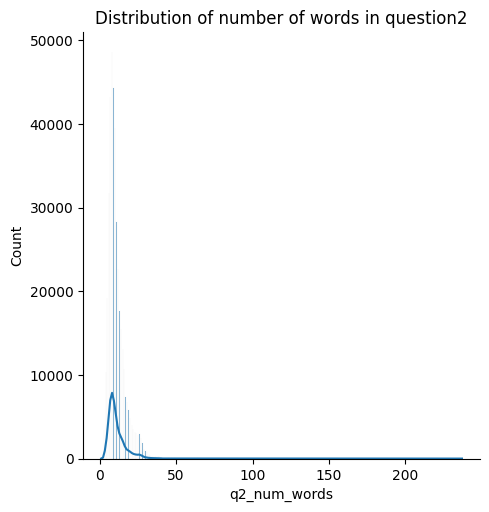

Max number of words in question2: 237
Min number of words in question2: 1
Mean number of words in question2: 11.181990650275791


In [22]:
sns.displot(df_copy['q2_num_words'], kde=True)
plt.title('Distribution of number of words in question2')
plt.show()
print(f'Max number of words in question2: {df_copy["q2_num_words"].max()}')
print(f'Min number of words in question2: {df_copy["q2_num_words"].min()}')
print(f'Mean number of words in question2: {df_copy["q2_num_words"].mean()}')

<Figure size 1200x600 with 0 Axes>

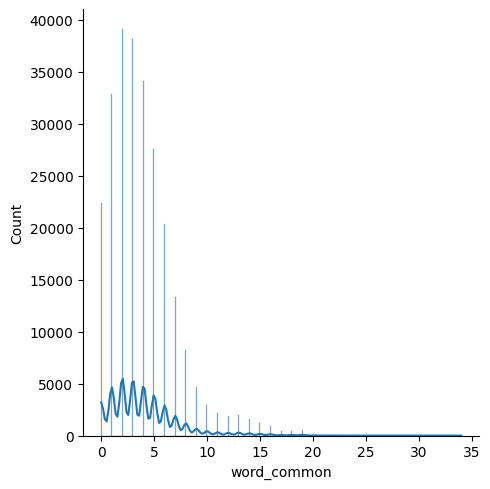

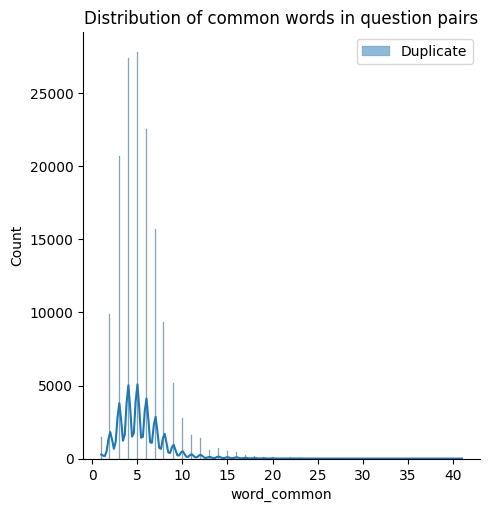

In [23]:
plt.figure(figsize=(12, 6))
sns.displot(df_copy[df_copy['is_duplicate'] == 0]['word_common'],kde=True, label='Not Duplicate')
sns.displot(df_copy[df_copy['is_duplicate'] == 1]['word_common'], kde = True, label='Duplicate')
plt.title('Distribution of common words in question pairs')
plt.legend()
plt.show()

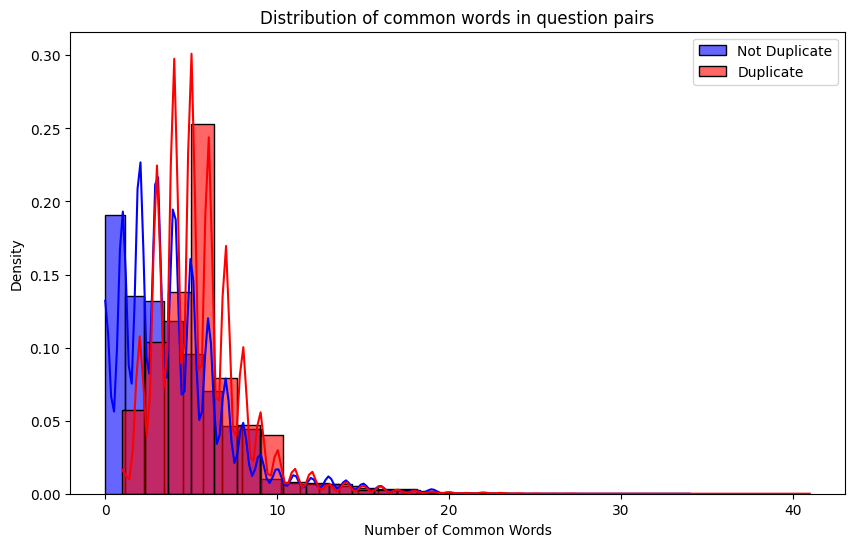

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the distribution for Not Duplicate
sns.histplot(
    df_copy[df_copy['is_duplicate'] == 0]['word_common'],
    color='blue',
    label='Not Duplicate',
    kde=True,   # Show Kernel Density Estimation
    stat='density',  # Normalize the histogram
    bins=30,    # Number of bins
    alpha=0.6   # Transparency of the histogram bars
)

# Plot the distribution for Duplicate
sns.histplot(
    df_copy[df_copy['is_duplicate'] == 1]['word_common'],
    color='red',
    label='Duplicate',
    kde=True,
    stat='density',
    bins=30,
    alpha=0.6
)

# Add title and labels
plt.title('Distribution of common words in question pairs')
plt.xlabel('Number of Common Words')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()


C:\Users\arkaj\AppData\Local\Temp\ipykernel_24144\3759177722.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\arkaj\AppData\Local\Temp\ipykernel_24144\3759177722.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


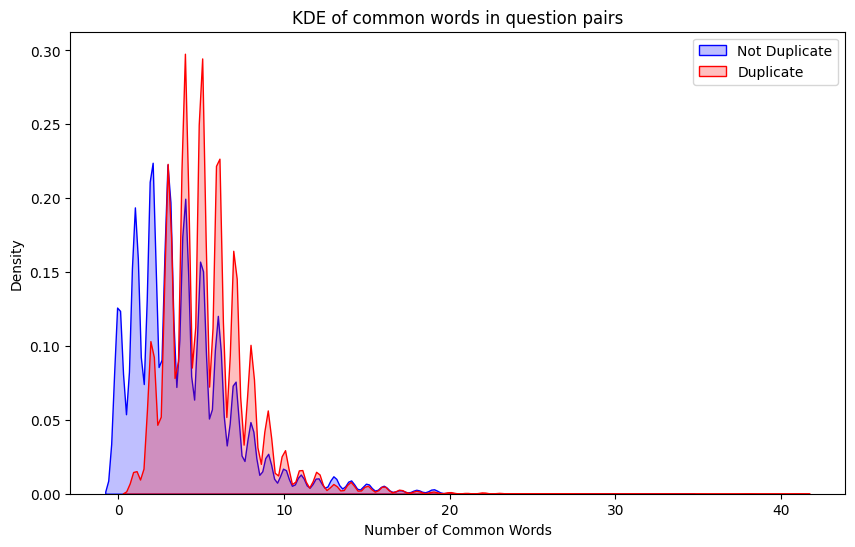

In [25]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    df_copy[df_copy['is_duplicate'] == 0]['word_common'],
    color='blue',
    label='Not Duplicate',
    shade=True
)

sns.kdeplot(
    df_copy[df_copy['is_duplicate'] == 1]['word_common'],
    color='red',
    label='Duplicate',
    shade=True
)

plt.title('KDE of common words in question pairs')
plt.xlabel('Number of Common Words')
plt.ylabel('Density')

plt.legend()
plt.show()


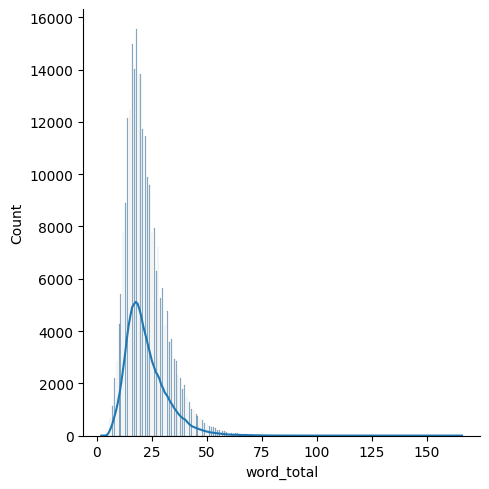

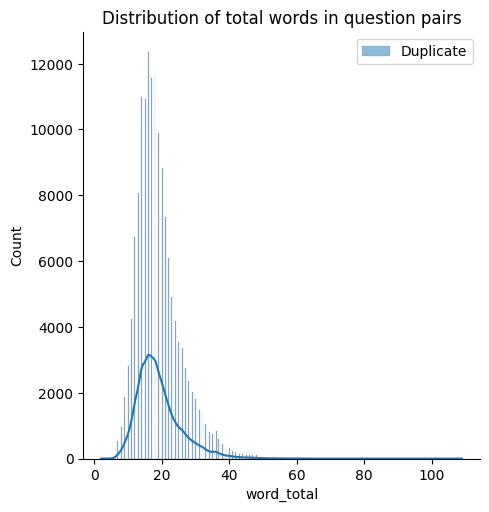

In [26]:
sns.displot(df_copy[df_copy['is_duplicate'] == 0]['word_total'], kde=True, label='Not Duplicate')
sns.displot(df_copy[df_copy['is_duplicate'] == 1]['word_total'], kde=True, label='Duplicate')
plt.title('Distribution of total words in question pairs')
plt.legend()
plt.show()

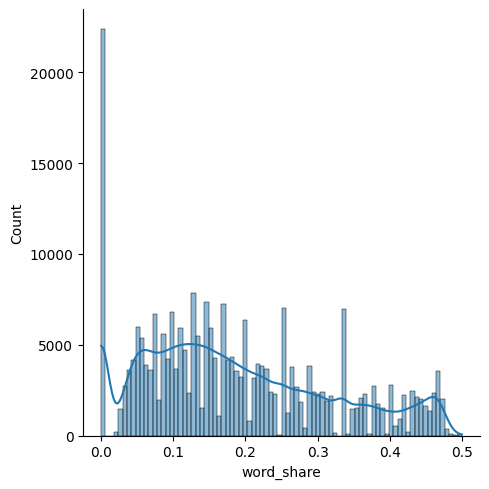

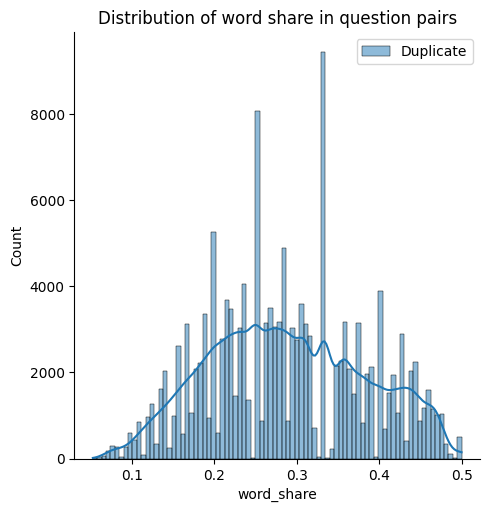

In [27]:
sns.displot(df_copy[df_copy['is_duplicate'] == 0]['word_share'], kde=True, label='Not Duplicate')
sns.displot(df_copy[df_copy['is_duplicate'] == 1]['word_share'], kde=True, label='Duplicate')
plt.title('Distribution of word share in question pairs')
plt.legend()
plt.show()

In [28]:
ques_df = df_copy[['question1', 'question2']]
ques_df.sample(2).values

array([['Which is a good inpatient drug and alcohol rehab center in Logan County IL?',
        'Which is a good inpatient drug and alcohol rehab center in Union County IL?'],
       ['How should I be emotionally strong?',
        'How can I become more emotionally strong?']], dtype=object)

In [29]:
final_df_copy = df_copy.drop(['qid1', 'qid2', 'question1', 'question2'], axis=1)
final_df_copy.head()

,id,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,0,66.0,57.0,14,12,10,23,0.434783
1,1,0,51.0,88.0,8,13,4,20,0.200000
2,2,0,73.0,59.0,14,10,4,24,0.166667
3,3,0,50.0,65.0,11,9,0,19,0.000000
4,4,0,76.0,39.0,13,7,2,20,0.100000


Using Bag of Words a simplified encoding technique We are making features for sentence 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
#merge text
questions = list(df['question1'].fillna('')) + list(df['question2'].fillna('')) 
#initialize count vectorizer
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)
print(q1_arr.shape, q2_arr.shape)

MemoryError: Unable to allocate 18.1 GiB for an array with shape (808580, 3000) and data type int64

In [2]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

NameError: name 'pd' is not defined

In [ ]:
final_df_copy